# Simple Linear Regression Algorithm from Scratch

## Dataset Description

The dataset contains the salary data based on the years of experience of an individual. It has a total of 30 samples.

Since it is a univariate linear regression model, there is only one independent feature i.e., `YearsExperience`. The dependent variable, i.e., the variable we want to predict through this model is the `Salary` variable.

The dataset has been taken from Kaggle contributed by Allena Venkata Sai Abhishek.

Link to dataset: `https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression`

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Loading the dataset into a pandas dataframe

In [3]:
dataset = pd.read_csv("Salary_dataset.csv", index_col=0)
dataset.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Understanding the dataset

In [4]:
print(f"Total number of samples: {dataset.shape[0]}")
print(f"Number of features: {dataset.shape[1]}")
print(f"Null values: {dataset.isnull().sum().sum()}")
print(f"Dependent variable (y): {dataset.columns[-1]}")
print(f"Independent variable (x): {dataset.columns[0]}")
print(f"Average years of experience: {dataset.iloc[:, 0].mean()}")
print(f"Average salary: {dataset.iloc[:, -1].mean()}")

Total number of samples: 30
Number of features: 2
Null values: 0
Dependent variable (y): Salary
Independent variable (x): YearsExperience
Average years of experience: 5.413333333333332
Average salary: 76004.0


### Plotting the data points

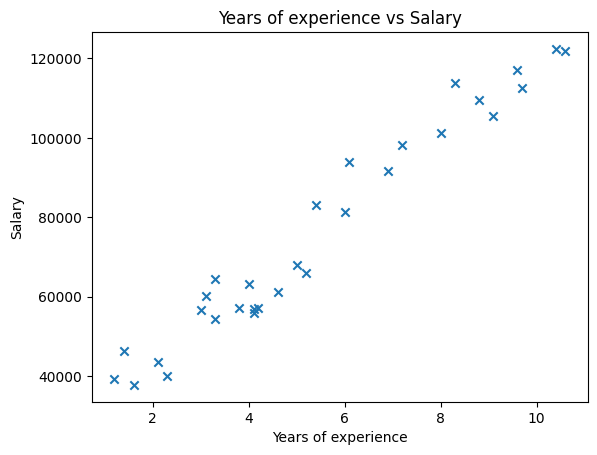

In [5]:
x_train = np.array(dataset.iloc[:, 0])
y_train = np.array(dataset.iloc[:, -1])


plt.scatter(x_train, y_train, marker='x')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Years of experience vs Salary")
plt.show()

## The Linear Regression Algorithm

Linear regression is a basic statistical algorithm used to find relationships between two things, like how one changes when the other changes. Imagine you’re studying how the number of hours someone studies affects their exam scores. You collect data from several students, plot it on a graph, and notice that as study hours increase, exam scores also tend to go up. Linear regression helps you draw the best-fitting straight line through those points, called the "line of best fit." This line summarizes the relationship, making it easier to predict an exam score based on the number of hours studied.

Another example could be predicting the cost of a house based on its size. If you gather data on house sizes and their prices, you can plot the data points and use linear regression to find a line that shows how price changes with size. Once you have this line, you can estimate the price of a house of a specific size.

The method works by minimizing the differences between the actual data points and the values predicted by the line. These differences are called "errors" or "residuals." Linear regression is widely used because it’s simple yet effective in many real-world scenarios, such as forecasting sales based on advertising spend, estimating fuel consumption based on speed, or predicting crop yield based on rainfall. It’s like a tool for finding patterns and making educated guesses based on past data.

### Simple vs Multiple Linear Regression

Linear Regression is broadly classified into two types:
- Simple Linear Regression
- Multiple Linear Regression

#### Simple Linear Regression

In this case, we use only one independent variable, like years of experience, to predict one dependent variable, salary. The relationship can be represented as:

$$\hat y = wX + b$$

Here:

- $\hat y$ is the predicted salary.
- $X$ is the input (years of experience).
- $w$ is the weight (slope of the line).
- $b$ is the bias (y-intercept).

For example, if we gather data showing how salaries vary with experience and plot it, linear regression finds the straight line that best fits the points. This allows us to predict the salary for someone with, say, 5 years of experience.

#### Multiple Linear Regression

When there are multiple factors influencing the salary, such as years of experience, education level, and number of certifications, we use multiple linear regression. The equation extends to:

$$\hat y = w_1X_1 + w_2X_2 + ... + w_nX_n + b$$

Here:
- $X_1$, $X_2$, ..., $X_n$ are the input features (years of experience, education level, certifications, etc.)
- $w_1$, $w_2$, ..., $w_n$ are the corresponding weights for each feature

This approach helps to capture the combined effect of multiple factors on the salary

### The Squared Error Cost Function

The quality of our predictions is measured using the squared error cost function:

$$ J(w, b) = \dfrac{1}{2m}\sum_{i=1}^{m} (\hat y_i - y_i)^2 $$

Here:

- $\hat y_i$ is the predicted salary of the $i^{th}$ data sample
- $y_i$ is the actual salary of the $i^{th}$ data sample
- $m$ is the total number of data samples

This function calculates the average squared difference between the predicted and actual salaries. The goal of linear regression is to minimize this cost.

In [6]:
def cost_function(x, y, w, b):
    m = x.shape[0]

    total_cost = 0
    for i in range(m):
        y_pred = w * x[i] + b
        sq_err = (y_pred - y[i])**2
        total_cost += sq_err

    return total_cost/(2*m)

### The Gradient Descent Algorithm

To find the best values for $w$ and $b$, we use the gradient descent algorithm. It updates the weights and bias iteratively to reduce the cost function obtained above. The updates are calculated as:

$$w = w - \alpha \dfrac{\delta J}{\delta w}$$
$$b = b - \alpha \dfrac{\delta J}{\delta b}$$

Here:

- $\alpha$ is the learning rate, which tells the algorithm how big of a step should it take in the next iteration
- $\dfrac{\delta J}{\delta w}$ and $\dfrac{\delta J}{\delta b}$ are the gradients of the cost function with respect to $w$ and $b$

These updates are performed unless the gradient descent algorithm reaches at a minimum or unless it converges. Altogether, the algorithm becomes:

$$repeat\hspace{0.15cm}until\hspace{0.15cm}convergence\hspace{0.15cm}\{$$
$$w = w - \alpha \dfrac{\delta J}{\delta w}$$
$$b = b - \alpha \dfrac{\delta J}{\delta b}$$
$$\}$$

The values of $\dfrac{\delta J}{\delta w}$ and $\dfrac{\delta J}{\delta b}$, after calculation come out to be:

$$\dfrac{\delta J}{\delta w} = \dfrac{1}{m}\sum_{i=1}^{m}(\hat y_i - y_i)x_i$$
$$\dfrac{\delta J}{\delta b} = \dfrac{1}{m}\sum_{i=1}^{m}(\hat y_i - y_i)$$

In our case, the gradient descent algorithm will keep on adjusting the values of w and b for the number of iterations we specify to it. Finally, it would return us a value of $w$ and $b$

In [7]:
def gradient_function(x, y, w, b):
    m = x.shape[0]
    grad_w = 0
    grad_b = 0
    for i in range(m):
        y_pred = w*x[i] + b
        term_w = (y_pred - y[i])*x[i]
        term_b = y_pred - y[i]
        grad_w += term_w
        grad_b += term_b

    return grad_w/m, grad_b/m

In [8]:
def gradient_descent(x, y, cost_function, gradient_function, w_in=0, b_in=0, alpha=0.01, num_iters=10000):
    cost_history = [] # Saving the cost at each iteration for plotting of graph in further steps
    w = w_in
    b = b_in
    for iteration in range(num_iters):
        grad_w, grad_b = gradient_function(x, y, w, b)
        w = w - alpha * grad_w
        b = b - alpha * grad_b
        if num_iters < 100000:
            cost_history.append(cost_function(x, y, w, b))
        if iteration % math.ceil(num_iters/10) == 0:
            print(f"Iteration {iteration}: Cost {cost_history[-1]:0.2e} ", f"grad_w: {grad_w: 0.3e}, grad_b: {grad_b: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
        
    return w, b, cost_history

In [9]:
w_init = 0
b_init = 0
alpha = 0.01
iters = 10000

w_final, b_final, cost_history = gradient_descent(x_train, y_train, cost_function, gradient_function, w_init, b_init, alpha, iters)

print(f"\nFinal calculated w and b with learning rate as {alpha} and after {iters} iterations:\nw: {w_final}\nb: {b_final}")

Iteration 0: Cost 1.30e+09  grad_w: -4.850e+05, grad_b: -7.600e+04   w:  4.850e+03, b: 7.60040e+02
Iteration 1000: Cost 1.65e+07  grad_w:  8.854e+01, grad_b: -6.033e+02   w:  9.880e+03, b: 2.19186e+04
Iteration 2000: Cost 1.57e+07  grad_w:  1.132e+01, grad_b: -7.711e+01   w:  9.505e+03, b: 2.44737e+04
Iteration 3000: Cost 1.56e+07  grad_w:  1.447e+00, grad_b: -9.856e+00   w:  9.457e+03, b: 2.48003e+04
Iteration 4000: Cost 1.56e+07  grad_w:  1.849e-01, grad_b: -1.260e+00   w:  9.451e+03, b: 2.48421e+04
Iteration 5000: Cost 1.56e+07  grad_w:  2.363e-02, grad_b: -1.610e-01   w:  9.450e+03, b: 2.48474e+04
Iteration 6000: Cost 1.56e+07  grad_w:  3.021e-03, grad_b: -2.058e-02   w:  9.450e+03, b: 2.48481e+04
Iteration 7000: Cost 1.56e+07  grad_w:  3.862e-04, grad_b: -2.631e-03   w:  9.450e+03, b: 2.48482e+04
Iteration 8000: Cost 1.56e+07  grad_w:  4.936e-05, grad_b: -3.363e-04   w:  9.450e+03, b: 2.48482e+04
Iteration 9000: Cost 1.56e+07  grad_w:  6.309e-06, grad_b: -4.299e-05   w:  9.450e+03

#### Plotting the value of the cost function vs the iteration number

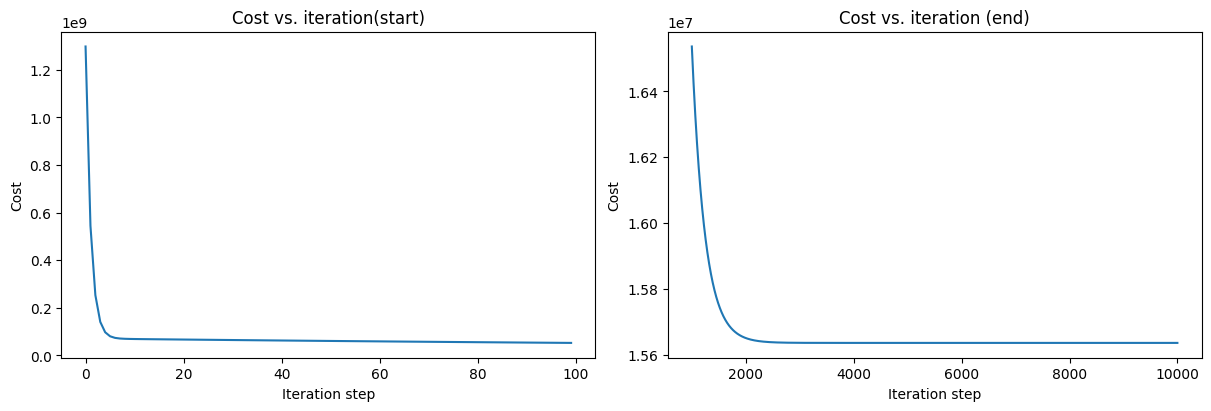

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('Iteration step')  ;  ax2.set_xlabel('Iteration step') 
plt.show()

## Putting together everything

Now that we have our cost function as well as the gradient descent algorithm ready, we can now put everything together to write the whole Linear Regression model and test it against our training data to evaluate how it performs.

For the evaluation, we shall be using $R^2$ score evaluation method. The $R^2$ score is defined as:

$$(1 - \dfrac{u}{v})$$

where:

- $u$ is the residual sum of squares
- $v$ is the total sum of squares

$u$ and $v$ are calculated as:

$$ u = \sum_{i=1}^{m}(y_i - \hat y_i)^2$$
$$ v = \sum_{i=1}^{m}(y_i - \bar y)^2$$

Here:
- $\hat y_i$ is the predicted salary of the $i^{th}$ data sample
- $y_i$ is the actual salary of the $i^{th}$ data sample
- $\bar y$ is the mean of the actual salaries of all the samples
- $m$ is the total number of data samples

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of `y`, disregarding the input features, would get a score of 0.0.

In [11]:
class UnivariateLinearRegression:
    def __init__(self, w_in:int, b_in:int, alpha:float, num_iters:int):
        self.w_in = w_in
        self.b_in = b_in
        self.w_final = None
        self.b_final = None
        self.alpha = alpha
        self.num_iters = num_iters
        self.predicted = None

    def cost_function(self, x, y, w, b):
        m = x.shape[0]

        total_cost = 0
        for i in range(m):
            y_pred = w * x[i] + b
            sq_err = (y_pred - y[i])**2
            total_cost += sq_err

        return total_cost/(2*m)
    
    def gradient_function(self, x, y, w, b):
        m = x.shape[0]
        grad_w = 0
        grad_b = 0
        for i in range(m):
            y_pred = w*x[i] + b
            term_w = (y_pred - y[i])*x[i]
            term_b = y_pred - y[i]
            grad_w += term_w
            grad_b += term_b

        return grad_w/m, grad_b/m
        
        
    def fit(self, x, y):
        w = self.w_in
        b = self.b_in

        for iteration in range(self.num_iters):
            grad_w, grad_b = self.gradient_function(x, y, w, b)
            w = w - self.alpha * grad_w
            b = b - self.alpha * grad_b
            if iteration % math.ceil(self.num_iters/10) == 0:
                print(f"Iteration {iteration}: Cost {cost_history[-1]:0.2e} ", f"grad_w: {grad_w: 0.3e}, grad_b: {grad_b: 0.3e}  ",
                    f"w: {w: 0.3e}, b:{b: 0.5e}")
                
        self.w_final = w
        self.b_final = b

        return self

    def predict(self, x):
        if self.w_final is None or self.b_final is None:
            print("ERROR: Model not trained")
            return self.predicted
        self.predicted = np.zeros(x.shape[0])
        for i in range(len(self.predicted)):
            self.predicted[i] = self.w_final * x[i] + self.b_final

        return self.predicted
    
    def score(self, x, y):
        if self.predicted is None:
            self.fit(x, y)
            self.predicted = self.predict(x)

        u = ((y - self.predicted)**2).sum()
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - (u/v))
    
    def plot(self, x, y):
        if self.predicted is None:
            self.fit(x, y)
            self.predicted = self.predict(x)

        plt.plot(x, self.predicted, c='r')
        plt.scatter(x, y, c='b', marker='x')
        plt.title("Regression line")
        plt.show()
        

Iteration 0: Cost 1.56e+07  grad_w: -4.850e+05, grad_b: -7.600e+04   w:  4.850e+03, b: 7.60040e+02
Iteration 1000: Cost 1.56e+07  grad_w:  8.854e+01, grad_b: -6.033e+02   w:  9.880e+03, b: 2.19186e+04
Iteration 2000: Cost 1.56e+07  grad_w:  1.132e+01, grad_b: -7.711e+01   w:  9.505e+03, b: 2.44737e+04
Iteration 3000: Cost 1.56e+07  grad_w:  1.447e+00, grad_b: -9.856e+00   w:  9.457e+03, b: 2.48003e+04
Iteration 4000: Cost 1.56e+07  grad_w:  1.849e-01, grad_b: -1.260e+00   w:  9.451e+03, b: 2.48421e+04
Iteration 5000: Cost 1.56e+07  grad_w:  2.363e-02, grad_b: -1.610e-01   w:  9.450e+03, b: 2.48474e+04
Iteration 6000: Cost 1.56e+07  grad_w:  3.021e-03, grad_b: -2.058e-02   w:  9.450e+03, b: 2.48481e+04
Iteration 7000: Cost 1.56e+07  grad_w:  3.862e-04, grad_b: -2.631e-03   w:  9.450e+03, b: 2.48482e+04
Iteration 8000: Cost 1.56e+07  grad_w:  4.936e-05, grad_b: -3.363e-04   w:  9.450e+03, b: 2.48482e+04
Iteration 9000: Cost 1.56e+07  grad_w:  6.309e-06, grad_b: -4.299e-05   w:  9.450e+03

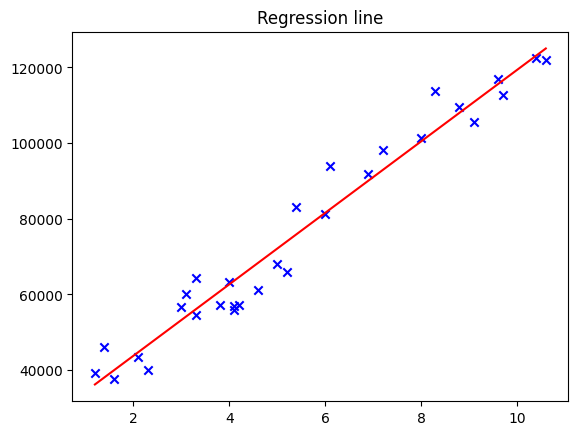

R2 score: 0.96


In [12]:
model = UnivariateLinearRegression(w_init, b_init, alpha, iters)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)

print(f"\nRegression plot:\n")

model.plot(x_train, y_train)

score = model.score(x_train, y_train)

print(f"R2 score: {score:.2f}")

### Example workflow in any case of linear regression

- Collect Data: Suppose you have data for 100 individuals, including their years of experience and salaries.
- Fit the Model: Use the data to train the regression model by minimizing the cost function using an algorithm such as gradient descent.
- Prediction: After training, the model might predict that someone with 5 years of experience earns ₹50,000, while someone with 10 years earns ₹80,000.
- Extension to Multivariate: If additional features like education and certifications are included, the model can provide more refined predictions by capturing their combined influence.

## Using the model to predict the salary of an individual given the years of experience

In [13]:
years_of_exp = 4.7
prediction = model.predict(np.array([years_of_exp]))

print(f"\nSalary of individual with {years_of_exp} years of experience will be {prediction[0]:.2f}")


Salary of individual with 4.7 years of experience will be 69263.03


# Thank You!